In [1]:
%reload_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Make analysis graphs for consistency/independence/robustness

In [6]:
dqn_runs = pd.read_csv('../simulations/eval/consistency_robustness_independence/DQN_Explorer.csv')
bo_runs = pd.read_csv('../simulations/eval/consistency_robustness_independence/BO_Ensemble.csv')

In [7]:
dqn_runs.head()

,id,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
0,a144729a-413a-11ea-8617-6bd9a3989b05,0,AUGGGCCGGACCCC,0.543747,0.543747,100,1,0.0,B1L14RNA1,startRNAL14_0,NAMb_ss0,10,10,DQN_Explorer
1,a144729a-413a-11ea-8617-6bd9a3989b05,1,UUGCAAUCACCUAC,0.162026,0.543747,100,101,852.0,B1L14RNA1,startRNAL14_0,NAMb_ss0,10,10,DQN_Explorer
2,a144729a-413a-11ea-8617-6bd9a3989b05,1,UUGCAAUCACGUAC,0.225188,0.543747,100,101,852.0,B1L14RNA1,startRNAL14_0,NAMb_ss0,10,10,DQN_Explorer
3,a144729a-413a-11ea-8617-6bd9a3989b05,1,UUGCAGCCAUACAC,0.238919,0.543747,100,101,852.0,B1L14RNA1,startRNAL14_0,NAMb_ss0,10,10,DQN_Explorer
4,a144729a-413a-11ea-8617-6bd9a3989b05,1,UUGCAGCCAUAGAC,0.238919,0.543747,100,101,852.0,B1L14RNA1,startRNAL14_0,NAMb_ss0,10,10,DQN_Explorer


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()


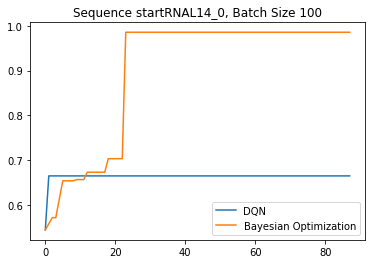

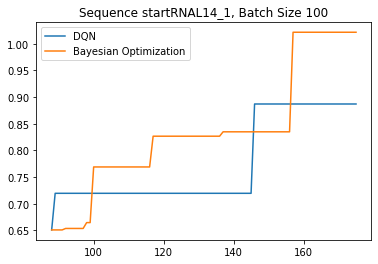

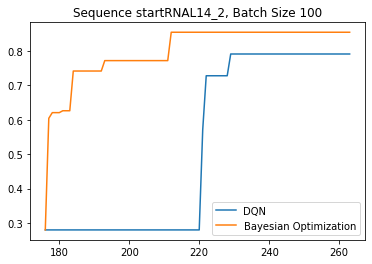

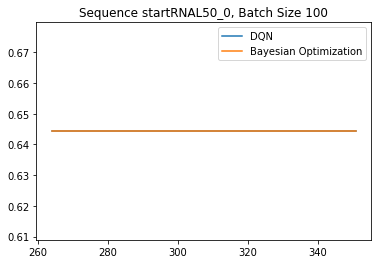

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


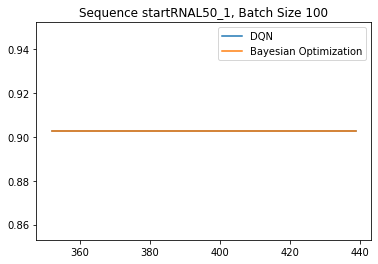

In [35]:
dqn_runs_grouped = dqn_runs.set_index(['start_id', 'batch_size', 'batch'])
bo_runs_grouped = bo_runs.set_index(['start_id', 'batch_size', 'batch'])

# make graph showing batch number vs. avg true score 
dqn_seq_batches = [seq_batch for seq_batch, _ in dqn_runs_grouped.groupby(level=[0,1])]
bo_seq_batches = [seq_batch for seq_batch, _ in bo_runs_grouped.groupby(level=[0,1])]
for seq_batch in dqn_seq_batches:
    if seq_batch not in bo_seq_batches:
        continue 
    seq, batch_size = seq_batch 
    seq_run_dqn = dqn_runs_grouped.loc[seq_batch]
    seq_run_bo = bo_runs_grouped.loc[seq_batch]
    batch_nums = sorted(set(seq_run_dqn.index))
    avg_ts_dqn = seq_run_dqn['true_score'].groupby(seq_run_dqn.index).max()
    avg_ts_dqn = avg_ts_dqn.loc[batch_nums]
    rolling_max_dqn = []
    best = 0
    for val in avg_ts_dqn:
        best = max(best, val)
        rolling_max_dqn.append(best)
    avg_ts_bo = seq_run_bo['true_score'].groupby(seq_run_bo.index).max()
    avg_ts_bo = avg_ts_bo.loc[batch_nums]
    rolling_max_bo = []
    best = 0
    for val in avg_ts_bo:
        best = max(best, val)
        rolling_max_bo.append(best)
    plt.title('Sequence {}, Batch Size {}'.format(seq, batch_size))
    plt.plot(batch_nums, rolling_max_dqn, label='DQN')
    plt.plot(batch_nums, rolling_max_bo, label='Bayesian Optimization')
    plt.legend()
    plt.show()

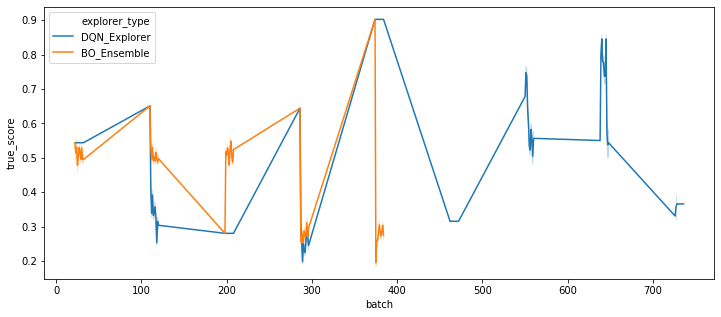

In [37]:
all_ml_runs = dqn_runs.append(bo_runs)
all_ml_runs['model_type'].unique()
sub_data = all_ml_runs[all_ml_runs['model_type'] == 'NAMb_ss0.9']
plt.figure(figsize=(12,5))
sns.lineplot(x="batch",y="true_score",hue="explorer_type",data=sub_data )

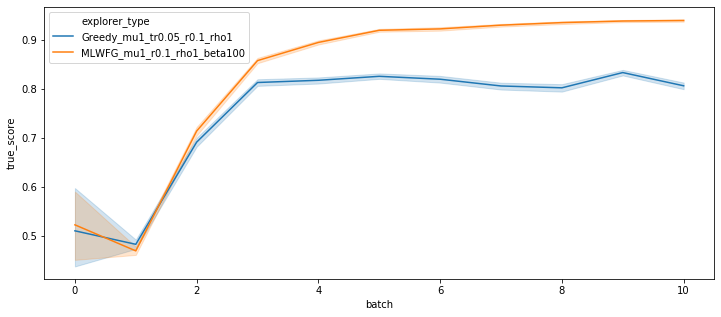

In [3]:
data1=pd.read_csv("../simulations/evaluations_test_six6/consistency_robustness_independence/Greedy_mu1_tr0.05_r0.1_rho1.csv",index_col=False)
data2=pd.read_csv("../simulations/evaluations_test_six6/consistency_robustness_independence/MLWFG_mu1_r0.1_rho1_beta100.csv",index_col=False)
data = data1.append(data2)
sub_data=data[data.model_type=="nn_arch=CNNa_hd100_f50"]
plt.figure(figsize=(12,5))
sns.lineplot(x="batch",y="true_score",hue="explorer_type",data=sub_data )

## Run analysis graphs for other simulation types 

In [ ]:
# TBD 